# Decorrelate samples

Author: Dimitris G. Giovanis,
Date: July 18, 2018


In this example, the class 'Decorrelate' is employed to decorrelate standard normal samples generated with the UQpy Correlate class.

In [1]:
from UQpy.SampleMethods import MCS, Correlate, Decorrelate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate uncorrelated standard normal samples
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)
# Define the correlation matrix of samples N(0, 1)
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
# Correlate the samples
y = Correlate(x, corr_norm=Rho)

Successful execution of MCS design..
UQpy: Performing correlation of the samples...
UQpy: Done.


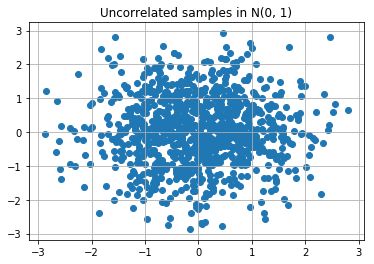

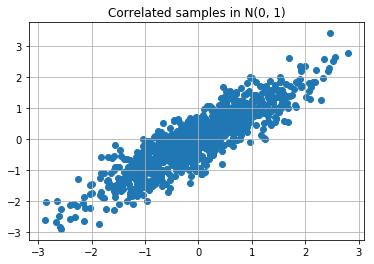

In [3]:
# Plot the distribution of the variables in the standard normal space
fig, ax = plt.subplots()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(y.samples[:, 0], y.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [4]:
# Use class 'Uncorrelate' to decorrelate the samples
y0 = Decorrelate(y, corr_norm=Rho)

UQpy: Performing decorrelation of the samples...
UQpy: Done.


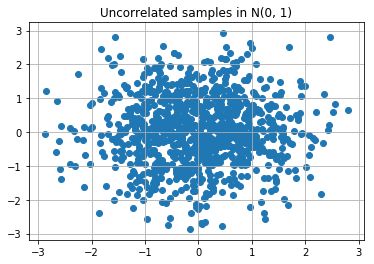

In [5]:
# Plot the distribution of the variables in the standard normal space
fig, ax = plt.subplots()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(y0.samples[:, 0], y0.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()